<a href="https://colab.research.google.com/github/leticiatituana/ds-certification/blob/main/Outliers_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('fortune_1000_2023.csv')
display(df.head())
print(df.shape)


,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,...,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated,Costs_M
0,1.0,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,...,C. Douglas McMillon,U.S.,Bentonville,AR,www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",416986.0,2023-08-02,NaN
1,2.0,Amazon,AMZN,Retailing,Internet Services and Retailing,no,no,no,no,0.0,...,Andrew R. Jassy,U.S.,Seattle,WA,www.amazon.com,Public,"Market value as of July 17, 2023.",1370373.0,2023-08-02,NaN
2,3.0,Exxon Mobil,XOM,Energy,Petroleum Refining,yes,no,no,no,3.0,...,Darren W. Woods,U.S.,Irving,TX,www.exxonmobil.com,Public,Excise taxes have been deducted. Market value ...,409878.0,2023-08-02,NaN
3,4.0,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,yes,-1.0,...,Timothy D. Cook,U.S.,Cupertino,CA,www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3051211.0,2023-08-02,NaN
4,5.0,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,0.0,...,Andrew P. Witty,U.S.,Minnetonka,MN,www.unitedhealthgroup.com,Public,"Market value as of July 17, 2023.",450694.0,2023-08-02,NaN


(1002, 32)


In [ ]:
#Metodos para identificar valores nulos
#Cuantitativo
#isnull
print("Identificar los valores faltantes")
#print(df.isnull()) #Si sale True es que sí hay valores nulos
print(df.isnull().sum()) #Sumamos los valores nulos

Identificar los valores faltantes
Rank                           51
Company                         1
Ticker                         43
Sector                          2
Industry                        2
Profitable                      2
Founder_is_CEO                  2
FemaleCEO                       2
Growth_in_Jobs                  9
Change_in_Rank                 73
Gained_in_Rank                 73
Dropped_in_Rank                73
Newcomer_to_the_Fortune500    502
Global500                       2
Best_Companies                  2
Number_of_employees             2
MarketCap_March31_M            43
Revenues_M                    101
RevenuePercentChange           11
Profits_M                     152
ProfitsPercentChange          136
Assets_M                        2
CEO                             3
Country                         2
HeadquartersCity                2
HeadquartersState               2
Website                         2
CompanyType                     2
Footnote      

In [ ]:
#define a threshold for "most" clumns
threshold=0.7

In [ ]:
num_cols=len(df.columns)
print(num_cols)

32


In [ ]:
null_threshold=int(num_cols*threshold)
print(null_threshold)

22


In [ ]:
num_rows_mostly_null=df[(df.isnull().sum(axis=1)>=null_threshold)].shape[0]

In [ ]:
print("Number of rows with mostly null values: ", num_rows_mostly_null)

Number of rows with mostly null values:  2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        951 non-null    float64
 1   Company                     1001 non-null   object 
 2   Ticker                      959 non-null    object 
 3   Sector                      1000 non-null   object 
 4   Industry                    1000 non-null   object 
 5   Profitable                  1000 non-null   object 
 6   Founder_is_CEO              1000 non-null   object 
 7   FemaleCEO                   1000 non-null   object 
 8   Growth_in_Jobs              993 non-null    object 
 9   Change_in_Rank              929 non-null    float64
 10  Gained_in_Rank              929 non-null    object 
 11  Dropped_in_Rank             929 non-null    object 
 12  Newcomer_to_the_Fortune500  500 non-null    object 
 13  Global500                   1000 

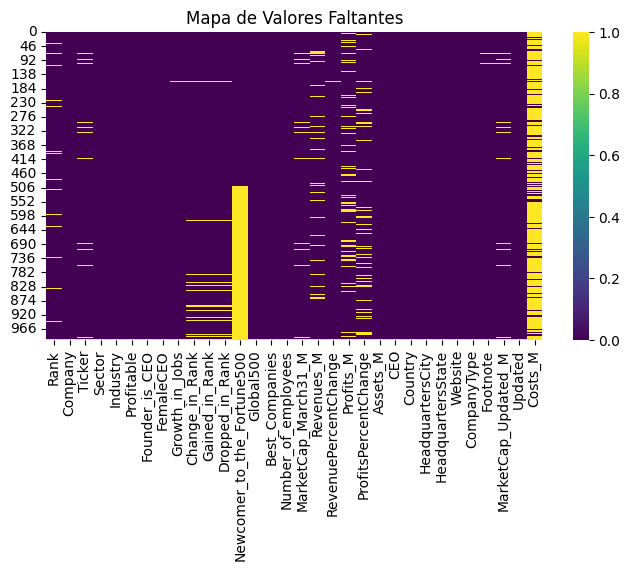

In [ ]:
#visual para ver datos faltantes
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Mapa de Valores Faltantes")
plt.show()

¿En qué país se encuentra ubicada la empresa con menor ganancia?
¿Cuál es la industria con ingresos más altos?
¿Qué secores e industrias ha? Cuál es su promedio de ingresos?
Cuál es el promedio de empleados para las empresas con ingresos menores al percentil 25?

Técnicas
1. Eliminación:Cuando eliminar filas/columnas es adecuado. Pandas nos provee con el método dropna()
2. Imputación Simple: Relleno con valores fijos (media, mediana, moda), fillna()
3. Imputación Avanzada (introducción): Uso de interpolación interpolate()




In [ ]:
#a Eliminación
print("\nEliminar filas con valores faltantes: ")
print(df.dropna().shape) #fijarse en nuevas dimensiones



Eliminar filas con valores faltantes: 
(60, 32)


In [ ]:
print(df.dropna(axis=1).shape) #fijarse en nuevas dimensiones

(1002, 0)


In [ ]:
#Una manera más controlada
threshold=0.5
#eliminar columnas que tengan al menos el 50% de valores nulos
df_dropped=df.dropna(axis=1, thresh=len(df)*threshold)
print(f"Hay {len(df_dropped.columns)} columas restantes: {df_dropped.columns}")


Hay 30 columas restantes: Index(['Rank', 'Company', 'Ticker', 'Sector', 'Industry', 'Profitable',
       'Founder_is_CEO', 'FemaleCEO', 'Growth_in_Jobs', 'Change_in_Rank',
       'Gained_in_Rank', 'Dropped_in_Rank', 'Global500', 'Best_Companies',
       'Number_of_employees', 'MarketCap_March31_M', 'Revenues_M',
       'RevenuePercentChange', 'Profits_M', 'ProfitsPercentChange', 'Assets_M',
       'CEO', 'Country', 'HeadquartersCity', 'HeadquartersState', 'Website',
       'CompanyType', 'Footnote', 'MarketCap_Updated_M', 'Updated'],
      dtype='object')


In [ ]:
threshold=0.3
#eliminar filas que tengan al menos el 50% de valores nulos
df_dropped=df.dropna(axis=0, thresh=int(len(df.columns)*threshold))
print(f"Hay {len(df_dropped)} filas restantes")

Hay 1000 filas restantes


In [ ]:
#Pregunta 1
display(df.Profits_M.info())
profit_null_rows=df[df.Profits_M.isnull()]
profit_null_rows.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 1002 entries, 0 to 1001
Series name: Profits_M
Non-Null Count  Dtype  
--------------  -----  
850 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


None

,Rank,Change_in_Rank,Number_of_employees,MarketCap_March31_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M,Costs_M
count,145.000000,142.000000,150.000000,144.000000,137.000000,150.000000,0.0,130.000000,1.500000e+02,144.000000,29.000000
mean,501.462069,-4.697183,31205.060000,26686.145833,21081.576642,17.767333,NaN,-38.735385,8.364469e+04,26906.305556,22038.137931
std,289.716792,68.627682,54924.394988,49256.307137,42071.822696,33.416335,NaN,244.175605,4.067234e+05,50733.836069,41687.654326
min,6.000000,-302.000000,0.000000,96.000000,2426.000000,-49.500000,NaN,-2400.500000,3.840000e+02,96.000000,927.000000
25%,265.000000,-29.750000,6244.250000,4018.750000,4140.000000,2.500000,NaN,-49.375000,5.290500e+03,4018.750000,3544.000000
50%,515.000000,-9.000000,12991.000000,8834.500000,7507.000000,11.050000,NaN,-8.950000,1.228200e+04,8834.500000,8264.000000
75%,735.000000,15.000000,31041.250000,23874.000000,17227.000000,22.775000,NaN,29.300000,2.929650e+04,24051.750000,16000.000000
max,1002.000000,334.000000,402000.000000,311093.000000,322467.000000,215.700000,NaN,320.500000,4.305288e+06,322698.000000,210787.000000


In [ ]:
#revisar relacion con Country
df.groupby("Country")["Profits_M"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
U.S.,850.0,1813.801176,6174.159562,-22819.0,189.0,600.5,1487.25,99803.0


In [ ]:
#cuánto de ganacias tiene el percentil 25
df_imputed=df.copy()
df_imputed["Profits_M"]=df_imputed["Profits_M"].fillna(df_imputed["Profits_M"].mean())
print("Resultados imputando con promedio: ")
display(df_imputed.groupby("Country")["Profits_M"].describe())
#imputar con mediana
df_imputed=df.copy()
df_imputed["Profits_M"]=df_imputed["Profits_M"].fillna(df_imputed["Profits_M"].median())
print("Resultados imputando con mediana: " )
display(df_imputed.groupby("Country")["Profits_M"].describe())

Resultados imputando con promedio: 


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
U.S.,1000.0,1813.801176,5691.791071,-22819.0,245.75,849.0,1813.801176,99803.0


Resultados imputando con mediana: 


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
U.S.,1000.0,1631.806,5708.271734,-22819.0,245.75,600.5,1280.75,99803.0


In [ ]:
#Cuál es la industria con ingresos más altos? Cuánto es el ingreso de esta industria?
revenue_null_rows=df[df["Revenues_M"].isnull()]
revenue_null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 10 to 1001
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        97 non-null     float64
 1   Company                     100 non-null    object 
 2   Ticker                      93 non-null     object 
 3   Sector                      99 non-null     object 
 4   Industry                    99 non-null     object 
 5   Profitable                  99 non-null     object 
 6   Founder_is_CEO              99 non-null     object 
 7   FemaleCEO                   99 non-null     object 
 8   Growth_in_Jobs              98 non-null     object 
 9   Change_in_Rank              90 non-null     float64
 10  Gained_in_Rank              90 non-null     object 
 11  Dropped_in_Rank             90 non-null     object 
 12  Newcomer_to_the_Fortune500  48 non-null     object 
 13  Global500                   99 non-nul

In [ ]:
#liminar filas donde ganancias e ingresos sean nulos a la vez
df_revenue_imputed=df.dropna(how="all", subset=["Profits_M", "Revenues_M"])
print(df_revenue_imputed.shape)
df_revenue_imputed.info()
diff=df.shape[0]-df_revenue_imputed.shape[0]
#print(f"Perdimos {diff} registros, que equivale a {round(diff/)}")

In [ ]:
#paso 2: interpolar ingresos basados en ganancias
# Paso 2: interpolar ingresos basados en ganancias
# ordenar por ganancias para que la interpolación sea signficativa
df_revenue_imputed = df_revenue_imputed.sort_values(by='Profits_M')
df_revenue_imputed['Revenues_M'] = df['Revenues_M'].interpolate(method='linear')

# visualizar profits vs revenues
plt.figure(figsize=(10, 6))
plt.scatter(df_revenue_imputed['Profits_M'], df_revenue_imputed['Revenues_M'], alpha=0.5)
plt.title('Profits vs. Revenues - con interpolacion')
plt.xlabel('Profits_M')
plt.ylabel('Revenues_M')
plt.grid()
plt.show()

NameError: name 'df_revenue_imputed' is not defined